In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('fivethirtyeight')

# CE 2120 Project - _Extended Knee Model_
### By Caroline Cook

In this project, I will be creating a inverted pendulum with one degree of freedom to model the movement of an extended knee. I will use the Newton-Euler derived equation of motion and accelerometer data that I recorded of myself walking to predict the reaction force load on the knee. With my data, I will also be able to show the relationship between acceleration and time.

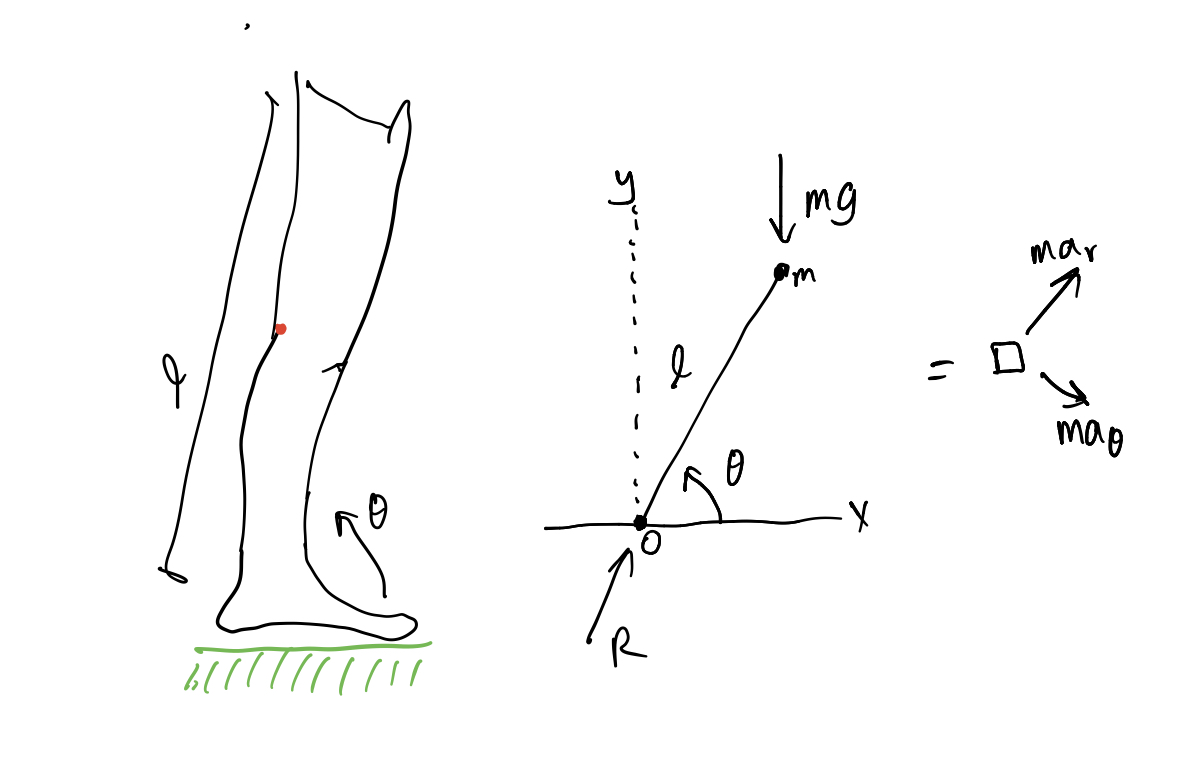

## Background 
Here are some important equations for the simple inverted pendulum. Considering that the more you lean forward, the faster you fall, it's ideal to simulate this movement with an exponential growth solution.

Equation of motion: 

$\ddot{\theta}(t) = \frac{g}{L}\cos\theta$, where $\ddot{\theta}(t)$ is the acceleration [in rad/s/s], g is 9.81 m/s/s, $\theta$ is the initial angle [in rad], and L is the length of the pendulum (leg) [in m]. 

$\dot{\theta}(t) = A\sqrt{\frac{g}{L}}e^{\sqrt{\frac{g}{L}}t} - B\sqrt{\frac{g}{L}}e^{-\sqrt{\frac{g}{L}}t}$, where $\dot{\theta}(t)$ is the angular velocity [in rad/s], and t is time [in s]. A and B are constants. 

$\theta(t) = Ae^{\sqrt{\frac{g}{L}}t} + Be^{-\sqrt{\frac{g}{L}}t}$, where $\theta(t)$ is the angle position [in rad]. 

---

The first step is to set inital conditions and solve for constants A and B. We want to solve for $\theta(0)$ and $\dot{\theta}(0)$. For $\dot{\theta}(0)$, we can say that a [normal walking pace](https://www.healthline.com/health/stride-length#calculate-step-and-stride-length) is 1.5 m/s, so we can set that equal to the euation. For $\theta(0)$, we need to find an angle that takes into account gait, step length, and leg length. Here, we are proposing that the step length is d = 0.6 m and length of leg is L = 0.8 m. Forming a right triangle, we can use trigonometry to find the initial angle. With those two equations, we can set up a system of equations and find A and B. Below, is the work to attain these values: 

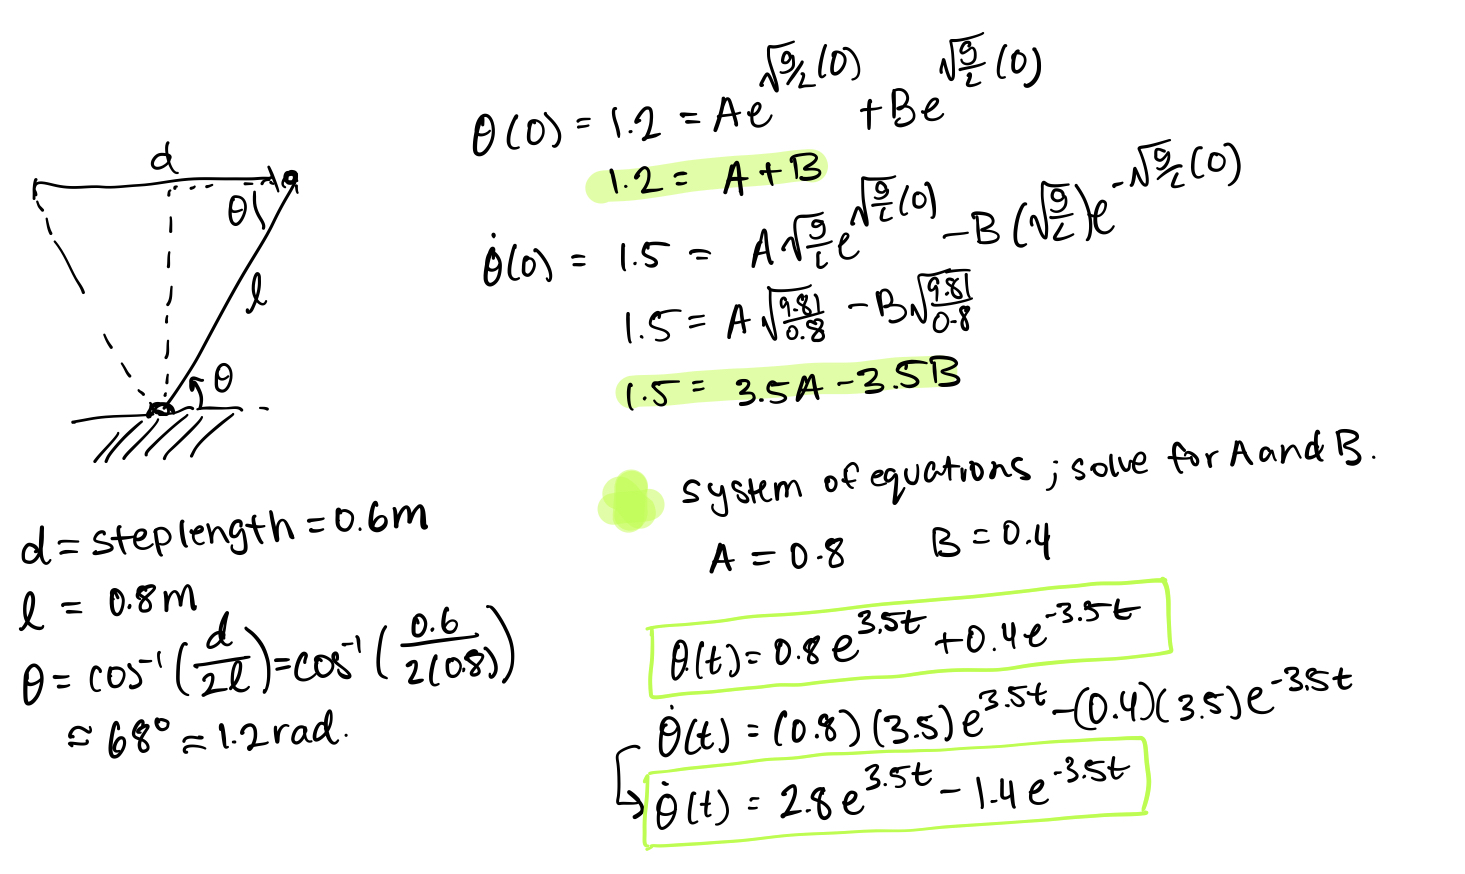

Text(0.5, 1.0, 'angle in degrees')

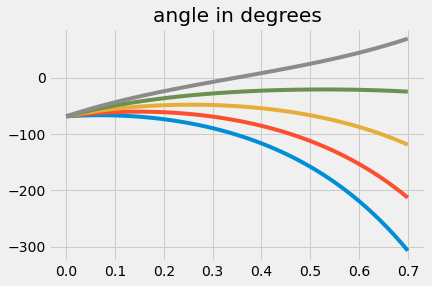

In [48]:
for dtheta0 in [1, 2, 3, 4, 5]:
    Z = np.array([[1, 1], 
                  [np.sqrt(g/L), -np.sqrt(g/L)]])
    x0 = np.array([-1.2, dtheta0])

    AB = np.linalg.solve(Z, x0)

    L = 0.8 #m
    g = 9.81 # m/s/s
    e = 2.71828
    t = np.linspace(0, 0.7) #4*np.pi) # 2 time periods of motion
    theta = AB[0]*np.exp(3.5*t) + AB[1]*np.exp(-3.5*t)
    dtheta = np.sqrt(g/L)*(AB[0]*np.exp(3.5*t) - AB[1]*np.exp(-3.5*t))
    ddtheta = g/L*(theta)

    plt.plot(t, theta*180/np.pi)
plt.title('angle in degrees')

Text(0.5, 1.0, 'Angular Acceleration VS Time')

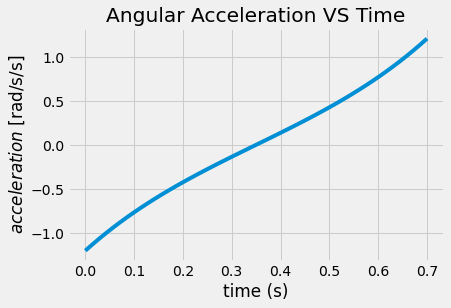

In [49]:
plt.plot(t, theta)
plt.xlabel('time (s)')
plt.ylabel('$acceleration$ [rad/s/s]')
plt.title('Angular Acceleration VS Time')

Text(0.5, 1.0, 'Acceleration VS Time')

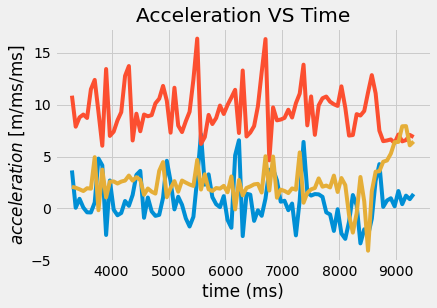

In [60]:
#Here we are plotting the accelerometer data I recorded of myself walking. I took 10 steps in 9 seconds. 
accel_data = np.loadtxt('./Untitled Experiment - Recording 1.txt', skiprows= 1, delimiter= ',')
i1 = 50
i2 = 500
plt.plot(accel_data[i1:i2, 0], accel_data[i1:i2, 1])
plt.plot(accel_data[i1:i2, 0], accel_data[i1:i2, 2])
plt.plot(accel_data[i1:i2, 0], accel_data[i1:i2, 3])
plt.xlabel('time (ms)')
plt.ylabel('$acceleration$ [m/ms/ms]')
plt.title('Acceleration VS Time')

Text(0, 0.5, '$acceleration$ [m/ms/ms]')

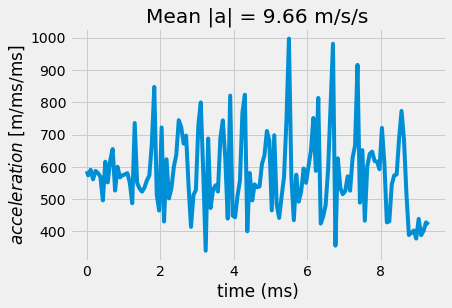

In [63]:
# plt.title('mean a_x = {:1.2f} m/s/s\na_y = {:1.2f}\na_z={:1.2f}'.format(
#     accel_data[i1:i2,1].mean(),
#     accel_data[i1:i2,2].mean(),
#     accel_data[i1:i2,3].mean()))

mag_a = np.sqrt(np.sum(accel_data[:, 1:3]**2, axis = 1))

plt.plot(accel_data[:,0]/1000, m*mag_a)
plt.title('Mean |a| = {:1.2f} m/s/s'.format(mag_a.mean()))
plt.xlabel('time (ms)')
plt.ylabel('$acceleration$ [m/ms/ms]')

Now that we have a solid equation derived, we are going to solve for the reaction force R. 

We have the equation:

$R = mL\dot{\theta}^2 + mg\cos\theta$, where R is the reaction force [in N] and m is the body's weight [in kg]. We can say that our mass will be 60 kg.

In [68]:
len(mag_a)

141

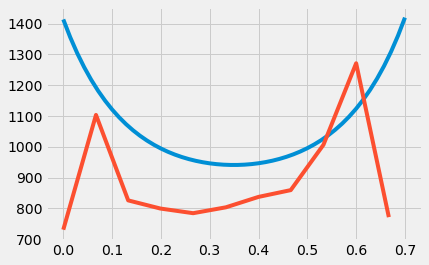

In [85]:
m = 60 #kg
i1 = 19
i2 = 30
R= m*g*np.cos(theta)+m*L*dtheta**2
plt.plot(t, R)
plt.plot((accel_data[i1:i2,0] - accel_data[i1,0])/1000, (m+30)*mag_a[i1:i2])

## Proposed Outline:

### Background

- What are you trying to model?
- How are you simplifying the model (here: aim for rigid bodies, massless springs, etc.)
- Draw a free body diagram and show the motion

### Model and method

- Show how you create your model: aim to explain to another student in CE2120
- State your assumptions, constants, equations
- Show your analysis
- What is important about your result? Show a graph or two to demonstrate what's important

### Wrapping up

- What was the original goal in your background? How did you meet the goal?
- What was an interesting fact you learned from this analysis? Did it change how you see this device?
- Any next steps? were there missing parts to the analysis? how could you make it better?


## Wrapping Up
